In [ ]:
import pandas as pd
import os
# Load the data 
os.chdir("/Users/thuytrang/Library/CloudStorage/OneDrive-Audencia/17. Python for finance ML/ML assignment Trang")
df = pd.read_csv("all-data.csv",encoding="ISO-8859-1",sep = ",",names=['Sentiment','Text'])
df.head()

,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [19]:
# number of rows
len(df)

4846

In [20]:
# types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   Text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [22]:
# Show first text 
print(df["Text"][0])

According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .


In [23]:
#Show the 1st sentiment
print("Sentiment is:", df["Sentiment"][0])

Sentiment is: neutral


In [24]:
# Show last review text
print(df["Text"][4845])

Sales in Finland decreased by 10.5 % in January , while sales outside Finland dropped by 17 % .


In [26]:
# Show last review sentiment
print("Sentiment is:", df["Sentiment"][4845])

Sentiment is: negative


In [27]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [30]:
# import the other relevant packages
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

# define a stemmer
porter = PorterStemmer()
# we turn reviews to lowercase
df["Text"]=df["Text"].str.lower()
# create array of cleaned reviews
text_clean =[]

# for each review text
for i in range(0, len(df['Text'])):
    # split the text into its words/tokens
    tokens = word_tokenize(df['Text'][i])
    #  create an empty array that will receive processed words/tokens
    final_token = []
    # for each word, add it to the clean array if alphanumerical 
    # and not a stop word, and after being stemmed
    for t in tokens:
        if t.isalpha():
            if not t in stop_words:
                final_token.append(porter.stem(t))
    # concatenate the cleaned word together to get a 
    # processed review text and add it to the cleaned reviews array   
    text_clean.append(' '.join(final_token))

In [31]:
# compare a raw text to the processed one
print(df['Text'][100])

both operating profit and turnover for the three-month period increased , respectively from eur0 .9 m and eur8 .3 m , as compared to the corresponding period in 2005 .


In [32]:
# compare a raw text to the processed one
print(text_clean[100])

oper profit turnov period increas respect compar correspond period


In [36]:
# now we do it for the text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000, min_df=100, max_df=1000)
X = vectorizer.fit_transform(text_clean).toarray()

In [37]:
print(X.shape) # 70 features (words of vocabulary)

(4846, 70)


In [40]:
# see the features names
vectorizer.get_feature_names_out()[:4846]

array(['accord', 'agreement', 'also', 'bank', 'build', 'busi', 'capit',
       'compani', 'compar', 'construct', 'contract', 'corpor',
       'correspond', 'custom', 'develop', 'eur', 'euro', 'expect',
       'financi', 'finland', 'finnish', 'first', 'group', 'hel',
       'helsinki', 'includ', 'increas', 'industri', 'invest', 'loss',
       'manag', 'manufactur', 'market', 'million', 'mln', 'mn', 'mobil',
       'net', 'new', 'nokia', 'oper', 'order', 'oyj', 'per', 'period',
       'plan', 'plant', 'price', 'product', 'profit', 'project', 'provid',
       'quarter', 'report', 'result', 'rose', 'said', 'sale', 'servic',
       'share', 'solut', 'system', 'technolog', 'today', 'total', 'unit',
       'use', 'valu', 'well', 'year'], dtype=object)

In [41]:
# see the features values for a text
X[0][:4846]

array([1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [46]:
print("For the first text,", "the word:",
      vectorizer.get_feature_names_out()[35], "appears",
      X[0][35], "times.")

For the first text, the word: mn appears 0 times.


In [47]:
# 1-gram and bigrams
vectorizer = CountVectorizer(ngram_range=(1,2), 
                             max_features=10000, min_df=100, max_df=1000)
X = vectorizer.fit_transform(text_clean)

In [49]:
print(X.shape) # 77 features (words of vocabulary)

(4846, 77)


In [50]:
# see the features names
vectorizer.get_feature_names_out()[0:4846]

array(['accord', 'agreement', 'also', 'bank', 'build', 'busi', 'capit',
       'compani', 'compar', 'construct', 'contract', 'corpor',
       'correspond', 'correspond period', 'custom', 'develop', 'eur',
       'eur million', 'eur mn', 'euro', 'expect', 'financi', 'finland',
       'finnish', 'first', 'group', 'hel', 'helsinki', 'includ',
       'increas', 'industri', 'invest', 'loss', 'manag', 'manufactur',
       'market', 'million', 'mln', 'mn', 'mn eur', 'mobil', 'net',
       'net sale', 'new', 'nokia', 'oper', 'oper profit', 'order', 'oyj',
       'per', 'period', 'plan', 'plant', 'price', 'product', 'profit',
       'project', 'provid', 'quarter', 'report', 'result', 'rose', 'said',
       'sale', 'servic', 'share', 'solut', 'system', 'technolog', 'today',
       'total', 'total eur', 'unit', 'use', 'valu', 'well', 'year'],
      dtype=object)

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [64]:
# see the features values for a text
X[0][:4846]

array([0.49112508, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.57405108, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.51225026, 0.        , 0.        , 0.40848645,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [65]:
import numpy as np
print("For the first review,", "the word:",
      vectorizer.get_feature_names_out()[36], 
      "has a relative frequency of", np.round(X[0][36],2), ".")

For the first review, the word: million has a relative frequency of 0.0 .


In [66]:
from sklearn.model_selection import train_test_split
y=df['Sentiment'] 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=y, shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3392, 77)
(3392,)
(1454, 77)
(1454,)


In [67]:
import sklearn.linear_model
logreg = sklearn.linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

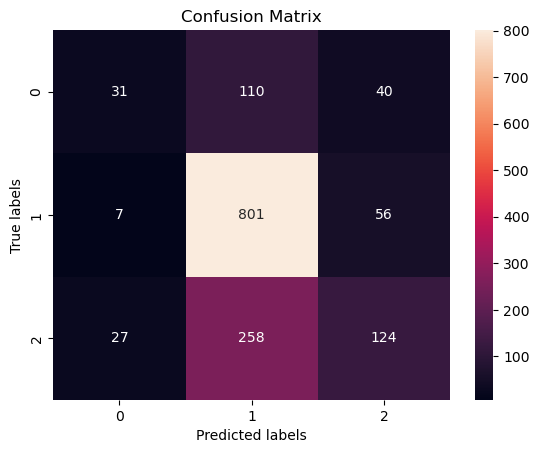

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.48      0.17      0.25       181
     neutral       0.69      0.93      0.79       864
    positive       0.56      0.30      0.39       409

    accuracy                           0.66      1454
   macro avg       0.58      0.47      0.48      1454
weighted avg       0.63      0.66      0.61      1454



In [73]:
# positive text
news = "In the second quarter of 2010 , the group 's net profit rose to EUR3 .1 m from EUR2 .5 m in April-June 2009 ."
news_vec = vectorizer.transform([news])
news_vec = tfidfconverter.fit_transform(news_vec).toarray()
prediction = logreg.predict(news_vec)
print(news)
print(prediction)

In the second quarter of 2010 , the group 's net profit rose to EUR3 .1 m from EUR2 .5 m in April-June 2009 .
['positive']


In [74]:
# neutral text
news = "There did not seem to be enough hours in a day for Pekkarinen ."
news_vec = vectorizer.transform([news])
news_vec = tfidfconverter.fit_transform(news_vec).toarray()
prediction = logreg.predict(news_vec)
print(news)
print(prediction)

There did not seem to be enough hours in a day for Pekkarinen .
['neutral']


In [77]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob(df["Text"][0], analyzer=NaiveBayesAnalyzer())
blob.sentiment
print("Text is :", df["Text"][0])
print("Associated sentiment is", df["Sentiment"][0])
print("Prediction from TextBlob is", blob.sentiment.classification)
## it gives the expected outcome

Text is : according to gran , the company has no plans to move all production to russia , although that is where the company is growing .
Associated sentiment is neutral
Prediction from TextBlob is pos
